In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd


In [ ]:
# Загружаем таблицу csv с данными клиентов
netflix_users_data = pd.read_csv('/content/drive/MyDrive/Курс/netflix_users_data.csv')

In [ ]:
# Проверяем загрузку таблицы
netflix_users_data

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [ ]:
# Получаем информацию о данных таблицы (Количество строк, пропуски, дубликаты)
netflix_users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


Всего в таблице 2500 строк и 10 столбцов.

In [ ]:
# Присваиваем таблице для удобства новое название
data = pd.DataFrame(netflix_users_data)


In [ ]:
# Названия столбцов твблицы
data.columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

In [ ]:
# Для дальнейшей работы переводим названия столбцов в формат camelCase
import re

# Функция перевода в camelCase
def to_camel_case(name):
    name = re.sub(r'\s+', ' ', name)  # убираем лишние пробелы
    parts = re.split(r'\s', name)
    return parts[0].lower() + ''.join(word.capitalize() for word in parts[1:])

# Выведем исходные названия
print("До преобразования:")
print(data.columns.tolist())

# Переименовываем столбцы
new_columns = [to_camel_case(col) for col in data.columns]
data.columns = new_columns

# Выведем новые названия
print("\nПосле преобразования:")
print(data.columns.tolist())


До преобразования:
['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date', 'Last Payment Date', 'Country', 'Age', 'Gender', 'Device', 'Plan Duration']

После преобразования:
['userId', 'subscriptionType', 'monthlyRevenue', 'joinDate', 'lastPaymentDate', 'country', 'age', 'gender', 'device', 'planDuration']


In [ ]:
# 1. Проверяем и удаляем полные дубликаты строк
print("Количество полных дубликатов до удаления:", data.duplicated().sum())
data = data.drop_duplicates()
print("✅ Дубликаты удалены\n")

# 2. Проверяем пропуски
print("Количество пропусков по столбцам:")
print(data.isnull().sum())

# 3. Удаляем строки с пропусками (если их немного)
data = data.dropna()

# 4. Проверяем результат
print("\n✅ Пропуски после обработки:")
print(data.isnull().sum().sum())  # должно быть 0
print("Финальное количество строк:", len(data))

Количество полных дубликатов до удаления: 0
✅ Дубликаты удалены

Количество пропусков по столбцам:
userId              0
subscriptionType    0
monthlyRevenue      0
joinDate            0
lastPaymentDate     0
country             0
age                 0
gender              0
device              0
planDuration        0
dtype: int64

✅ Пропуски после обработки:
0
Финальное количество строк: 2500


In [ ]:
# Определяем общее количество уникальных клиентов, основываясь на данных столбца 'userId'

# Определяем количество уникальных пользователей
unique_users_count = data['userId'].nunique()

# Выводим результат
print(f"Количество уникальных пользователей: {unique_users_count}")

Количество уникальных пользователей: 2500


Первый пользователь зарегистрировался: 2021-09-05
Последний пользователь зарегистрировался: 2023-06-14

ТОП-10 дней по числу регистраций:
joinDate
2022-11-05    33
2022-06-30    31
2022-07-16    30
2022-11-04    29
2022-07-17    29
2022-10-23    28
2022-06-26    27
2022-10-27    26
2022-11-02    24
2022-07-13    24
dtype: int64


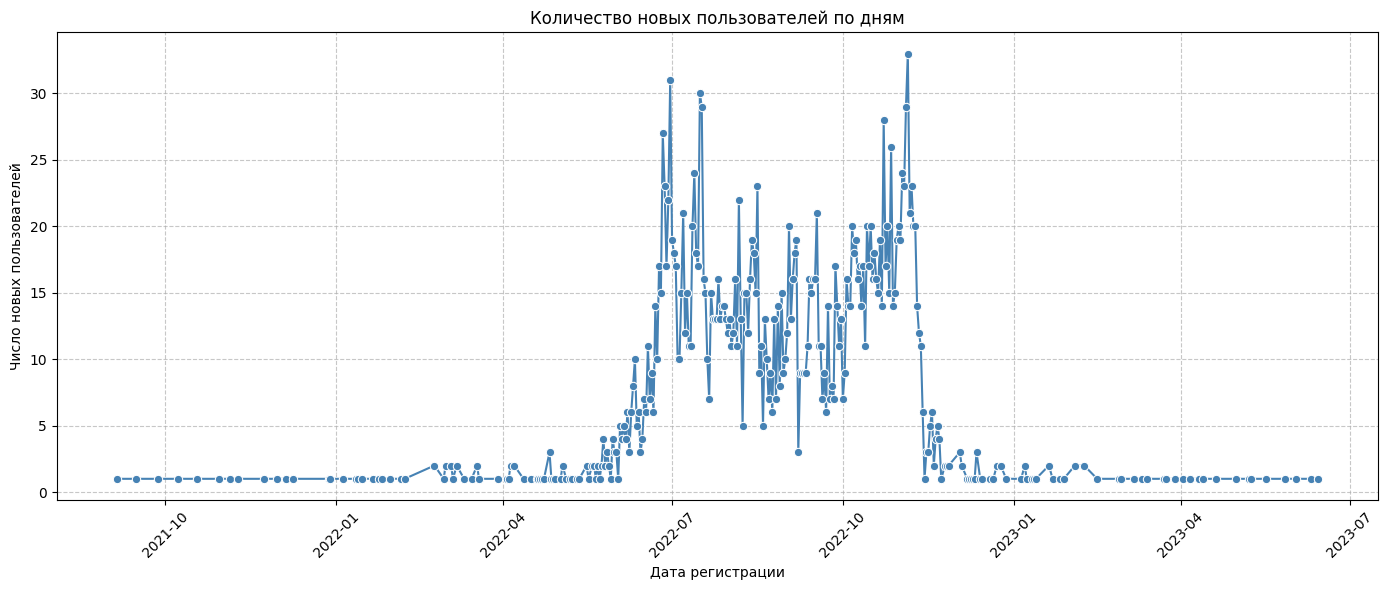

In [ ]:
# Определяем период в который зарегистрировались пользователи
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Шаг 1: Переводим 'joinDate' в datetime
data['joinDate'] = pd.to_datetime(data['joinDate'], format='%d-%m-%y', errors='coerce')

# Шаг 2: Определяем первый и последний день регистрации
min_date = data['joinDate'].min().date()
max_date = data['joinDate'].max().date()

print(f"Первый пользователь зарегистрировался: {min_date}")
print(f"Последний пользователь зарегистрировался: {max_date}")

# Шаг 3: Считаем количество новых пользователей по дням
users_by_day = (
    data.groupby(data['joinDate'].dt.date).size()
)

# Выводим топ-10 дней по количеству регистраций
print("\nТОП-10 дней по числу регистраций:")
print( users_by_day.sort_values(ascending=False).head(10) )

# Шаг 4: График активности по дням
plt.figure(figsize=(14, 6))
sns.lineplot(x=users_by_day.index, y=users_by_day.values, marker='o', color='steelblue')
plt.title('Количество новых пользователей по дням')
plt.xlabel('Дата регистрации')
plt.ylabel('Число новых пользователей')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

График показывает динамику роста числа новых пользователей по дням. График охватывает период с октября 2021 года по июль 2023 года .
Это более чем 2 года, что позволяет увидеть долгосрочную тенденцию. На графике виден стабильный рост количества новых пользователей до середины 2022 года.
Есть выдающиеся пики, например: Июль 2022 года - pначительное увеличение числа регистраций (30 новых пользователей).
Ноябрь 2022 года - ещё один пик (28 новых пользователей). После этого наблюдается резкий спад количества новых пользователей.

📊 Статистика по возрасту:
count    2500.000000
mean       38.795600
std         7.171778
min        26.000000
25%        32.000000
50%        39.000000
75%        45.000000
max        51.000000
Name: age, dtype: float64


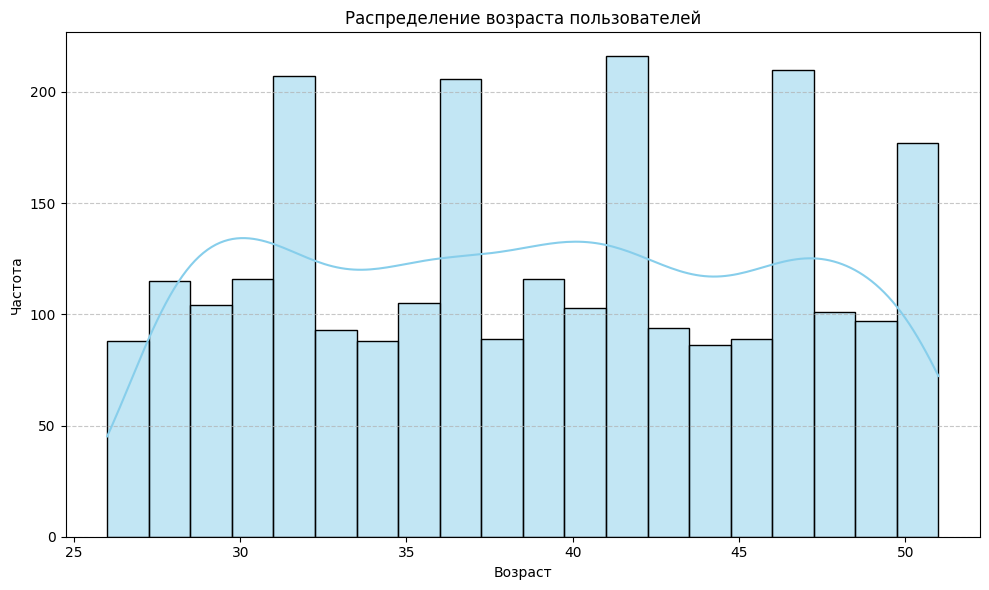

In [ ]:
# Изучаем возраст пользователей
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Шаг 1: Выведем общую статистику
print("📊 Статистика по возрасту:")
print(data['age'].describe())

# Шаг 2: Проверим на аномалии (слишком маленький или слишком большой возраст)
min_age = 18
max_age = 90
filtered_data = data[(data['age'] >= min_age) & (data['age'] <= max_age)]

# Если есть подозрительные значения
anomalies = data[~data.index.isin(filtered_data.index)]
if not anomalies.empty:
    print("\n❗ Аномалии в возрасте:")
    print(anomalies['age'].value_counts().sort_index())

# Шаг 3: Гистограмма + KDE
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['age'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Гистограмма отображает количество пользователей в каждом возрастном диапазоне.
Распределение имеет пиковое значение около 35–40 лет, где наблюдается максимальное количество пользователей.
Структура распределения:
Слева от пика: Частота возрастает с увеличением возраста до ~35–40 лет.
Правее пика: Частота постепенно снижается после 40–45 лет. Возраст 35–40 лет является самой активной группой .
Это говорит о том, что большинство пользователей приходится на эту возрастную категорию. Распределение имеет симметричный вид с одним пиком . Целевая аудитория: Фокусируйтесь на клиентах 35–40 лет , так как они составляют основную часть пользователей.
Маркетинговые стратегии: Разработайте специальные предложения для этой возрастной группы.
Анализ причин спада: Исследуйте, почему число пользователей уменьшается после 40–45 лет — возможно, это связано с изменением интересов или предпочтений.

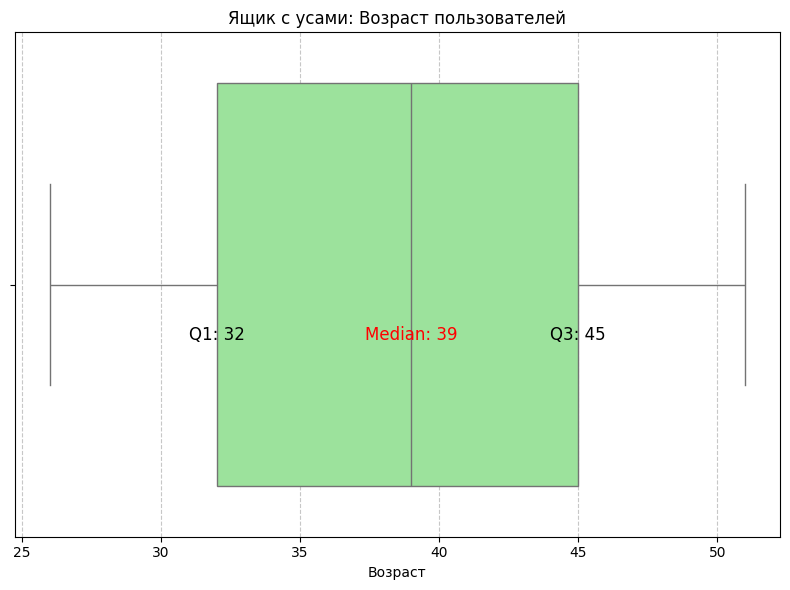

Q1 (25%): 32
Median (50%): 39
Q3 (75%): 45


In [ ]:
# Построим "ящик с усами"
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Рассчитываем квартили и медиану
q1 = np.percentile(filtered_data['age'], 25)
median = np.percentile(filtered_data['age'], 50)
q3 = np.percentile(filtered_data['age'], 75)

# Строим ящик с усами
plt.figure(figsize=(8, 6))
box = sns.boxplot(x=filtered_data['age'], color='lightgreen', orient='h')

# Добавляем подписи к графику
plt.text(q1, 0.1, f'Q1: {int(q1)}',
         horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')
plt.text(q3, 0.1, f'Q3: {int(q3)}',
         horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')
plt.text(median, 0.1, f'Median: {int(median)}',
         horizontalalignment='center', verticalalignment='center', fontsize=12, color='red')

# Оформление графика
plt.title('Ящик с усами: Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Выводим значения в тексте
print(f"Q1 (25%): {int(q1)}")
print(f"Median (50%): {int(median)}")
print(f"Q3 (75%): {int(q3)}")

Отображает интерквартильный размах (IQR) :
Нижняя граница ящика — Q1 (25-й персентиль) = 32
Верхняя граница ящика — Q3 (75-й персентиль) = 45
Линия внутри ящика — медиана (50-й персентиль) = 39
Указывают на нормальный диапазон данных:
Нижний усик — минимальное значение в нормальном диапазоне
Верхний усик — максимальное значение в нормальном диапазоне
Распределение выглядит симметричным , так как медиана находится примерно посередине ящика.
Нет явных выбросов за пределами усов.
Большинство пользователей сосредоточены между 32 и 45 лет.

📊 Количество пользователей по полу:
gender
Female    1257
Male      1243
Name: count, dtype: int64

🧮 Процентное распределение по полу:
gender
Female    50.28%
Male      49.72%
Name: count, dtype: object


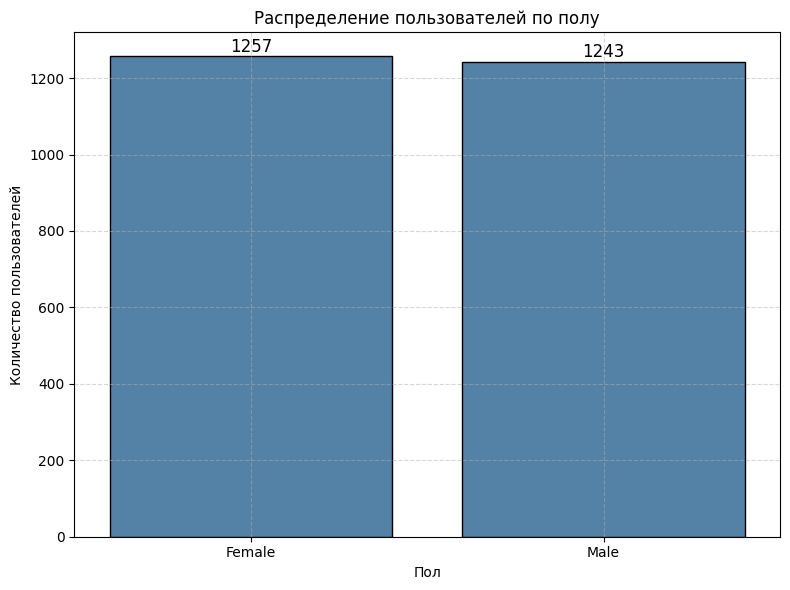

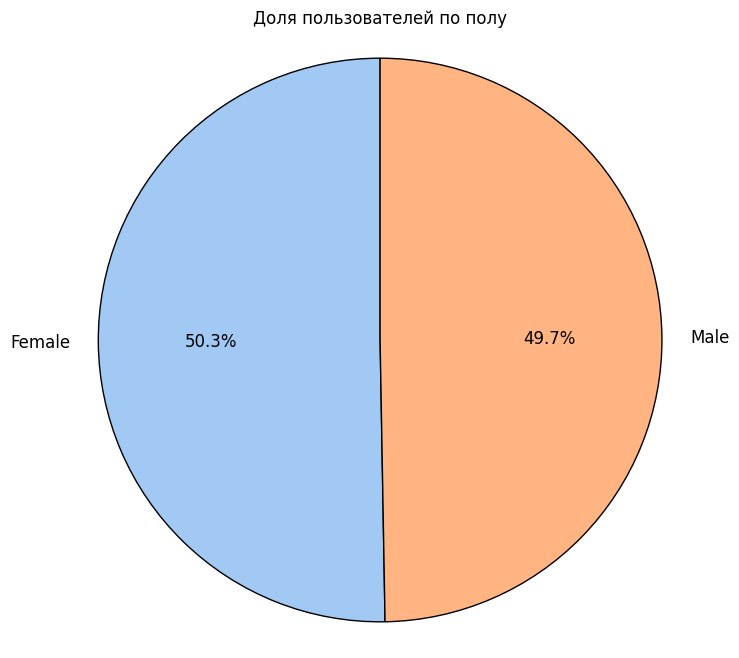

In [ ]:
# Мзучим распределение по полу пользователей

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Приведём к единому формату
gender_map = {
    'Male': 'Male',
    'male': 'Male',
    'M': 'Male',
    'Female': 'Female',
    'female': 'Female',
    'F': 'Female'
}

data['gender'] = data['gender'].map(gender_map).fillna('Unknown')

# Шаг 1: Считаем количество пользователей по полу
gender_distribution = data['gender'].value_counts()
gender_percent = gender_distribution / gender_distribution.sum() * 100

print("📊 Количество пользователей по полу:")
print(gender_distribution)

print("\n🧮 Процентное распределение по полу:")
print(gender_percent.map("{:.2f}%".format))

# Шаг 2: Столбчатая диаграмма
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_distribution.index, y=gender_distribution.values, color='steelblue', edgecolor='black')
plt.title('Распределение пользователей по полу')
plt.xlabel('Пол')
plt.ylabel('Количество пользователей')

# Подписываем значения на столбцах
for i, value in enumerate(gender_distribution.values):
    plt.text(i, value + 0.01 * gender_distribution.max(), str(value), ha='center', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Шаг 3: Круговая диаграмма (pie chart)
plt.figure(figsize=(8, 8))
plt.pie(
    gender_percent,
    labels=gender_distribution.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel'),
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 12}
)
plt.title('Доля пользователей по полу')
plt.axis('equal')  # делает круг идеальным
plt.show()

Количество пользователей женщин - 1257 человек или 50,3%
Количество пользователей мужчин - 1243 человека или 49,7%

📱 Распределение пользователей по устройствам:
device
Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: count, dtype: int64

🧮 Процентное распределение:
device
Laptop        25.44%
Tablet        25.32%
Smartphone    24.84%
Smart TV      24.40%
Name: count, dtype: object


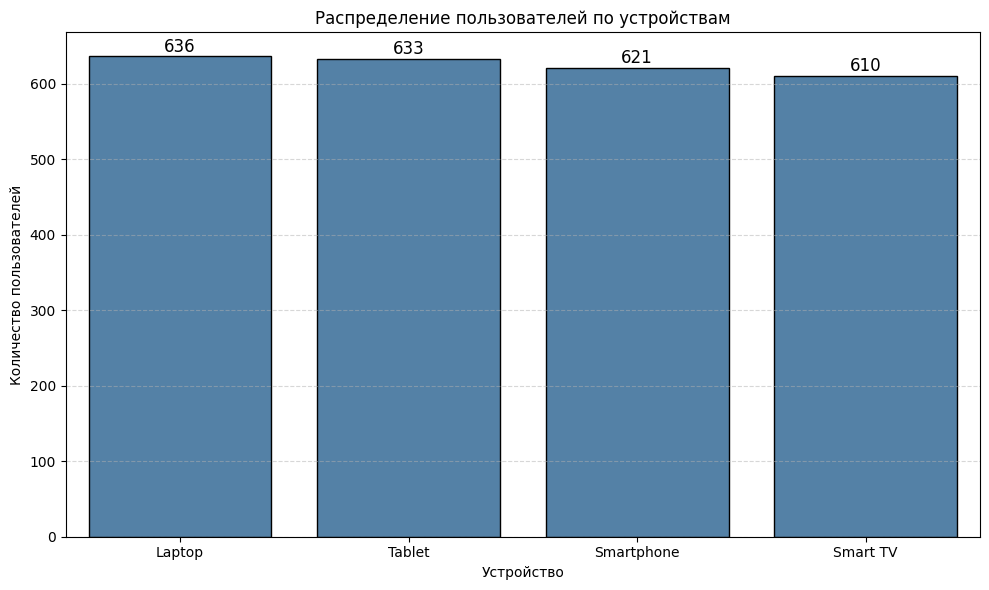

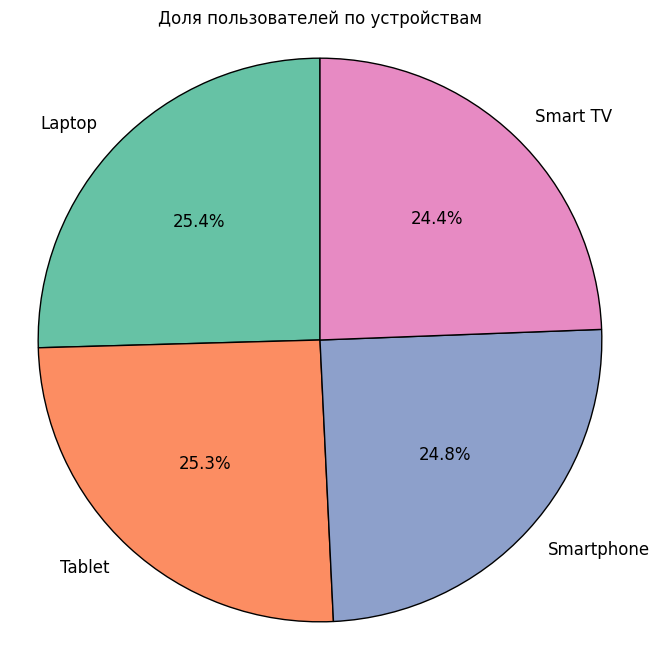

In [ ]:
# Проанализируем данные по устройствам пользователей

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Шаг 1: Считаем количество пользователей по устройствам
device_distribution = data['device'].value_counts()
device_percent = device_distribution / device_distribution.sum() * 100

print("📱 Распределение пользователей по устройствам:")
print(device_distribution)

print("\n🧮 Процентное распределение:")
print(device_percent.map("{:.2f}%".format))

# Шаг 2: Столбчатая диаграмма
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=device_distribution.index, y=device_distribution.values, color='steelblue', edgecolor='black')
plt.title('Распределение пользователей по устройствам')
plt.xlabel('Устройство')
plt.ylabel('Количество пользователей')

# Подписываем значения на столбцах
for i, value in enumerate(device_distribution.values):
    barplot.text(i, value + 0.01 * device_distribution.max(), str(value), ha='center', fontsize=12)

plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Шаг 3: Круговая диаграмма (pie chart)
plt.figure(figsize=(8, 8))
plt.pie(
    device_percent,
    labels=device_percent.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('Set2'),
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 12}
)
plt.title('Доля пользователей по устройствам')
plt.axis('equal')  # чтобы круг был круглым, а не овальным
plt.show()

Количество пользователей четырех видов устройств (Laptop,Tablet, Smartphone,
Smart TV) примерно одинаково.

📊 Количество пользователей по типам подписки:
subscriptionType
Basic       999
Standard    768
Premium     733
Name: count, dtype: int64

🧮 Процентное распределение:
subscriptionType
Basic       39.96%
Standard    30.72%
Premium     29.32%
Name: count, dtype: object


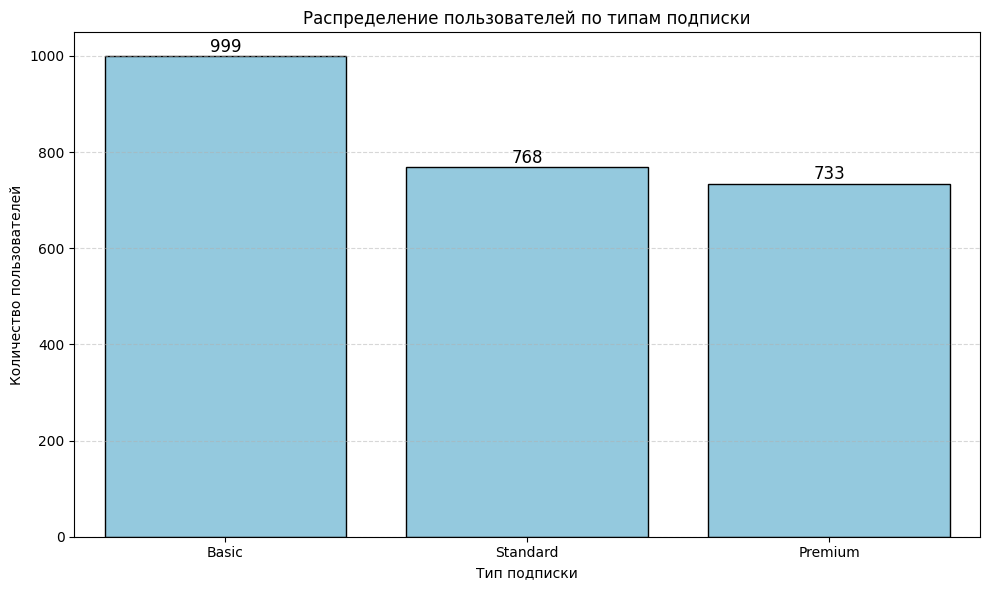

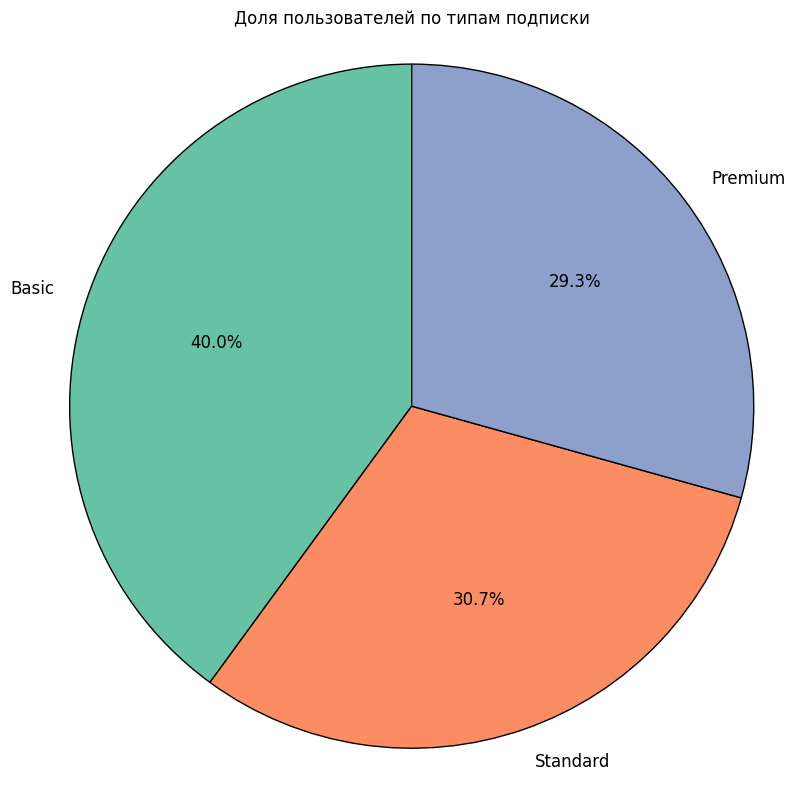

In [ ]:
# Изучим распределение по типу подписки пользователей
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Предполагается, что у тебя есть DataFrame data с колонкой 'subscriptionType'

# Шаг 1: Считаем количество пользователей по типам подписки
sub_types = data['subscriptionType'].value_counts()
sub_percent = sub_types / sub_types.sum() * 100

print("📊 Количество пользователей по типам подписки:")
print(sub_types)

print("\n🧮 Процентное распределение:")
print(sub_percent.map("{:.2f}%".format))

# Шаг 2: Столбчатая диаграмма
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=sub_types.index, y=sub_types.values, color='skyblue', edgecolor='black')
plt.title('Распределение пользователей по типам подписки')
plt.xlabel('Тип подписки')
plt.ylabel('Количество пользователей')

# Подписываем значения на столбцах
for i, value in enumerate(sub_types.values):
    barplot.text(i, value + 0.01 * sub_types.max(), str(value), ha='center', fontsize=12)

plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Шаг 3: Круговая диаграмма (pie chart)
plt.figure(figsize=(8, 8))
plt.pie(
    sub_percent,
    labels=sub_percent.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('Set2'),
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 12}
)
plt.title('Доля пользователей по типам подписки')
plt.axis('equal')  # делает круг идеальным
plt.tight_layout()
plt.show()

Процентное распределение пользователейпо типу подписки:
Basic       39.96%
Standard    30.72%
Premium     29.32%
Количество пользователей по типам подписки:
Basic       999
Standard    768
Premium     733

Больше всего пользователей — на Basic подписке. Это говорит о том, что большинство пользователей выбирают минимальную цену. Это может быть сигналом к тому, чтобы пересмотреть стратегию ценообразования или улучшить предложение для Basic-подписки.

🌍 Количество пользователей по странам:
country
United States     451
Spain             451
Canada            317
United Kingdom    183
Germany           183
Australia         183
France            183
Brazil            183
Mexico            183
Italy             183
Name: count, dtype: int64

🧮 Процентное распределение:
country
United States     18.04%
Spain             18.04%
Canada            12.68%
United Kingdom     7.32%
Germany            7.32%
Australia          7.32%
France             7.32%
Brazil             7.32%
Mexico             7.32%
Italy              7.32%
Name: count, dtype: object


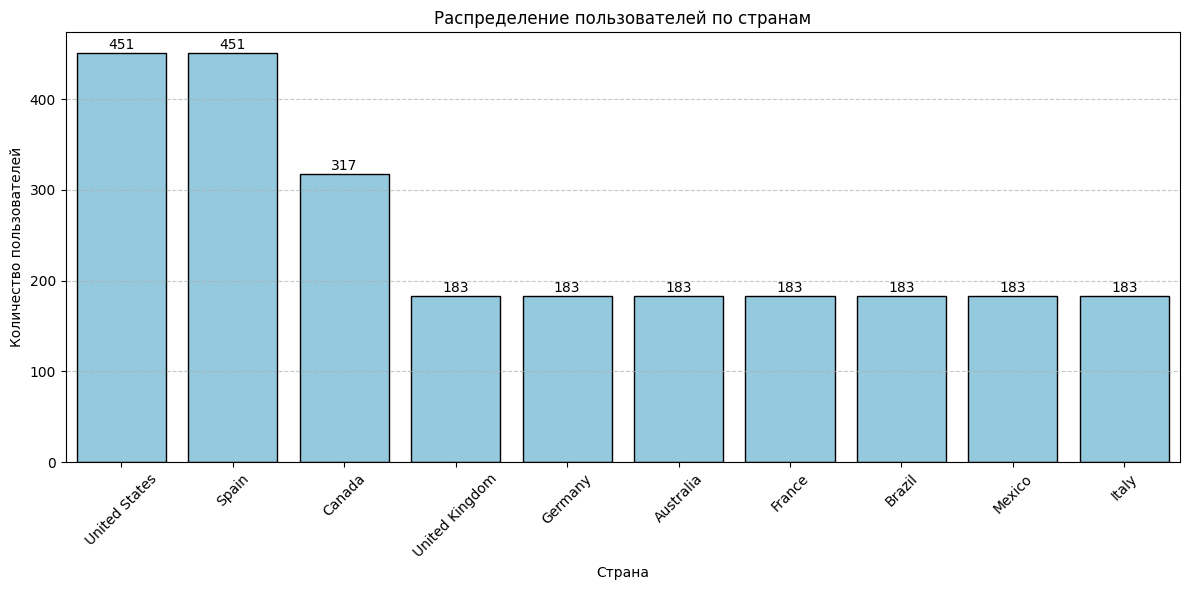

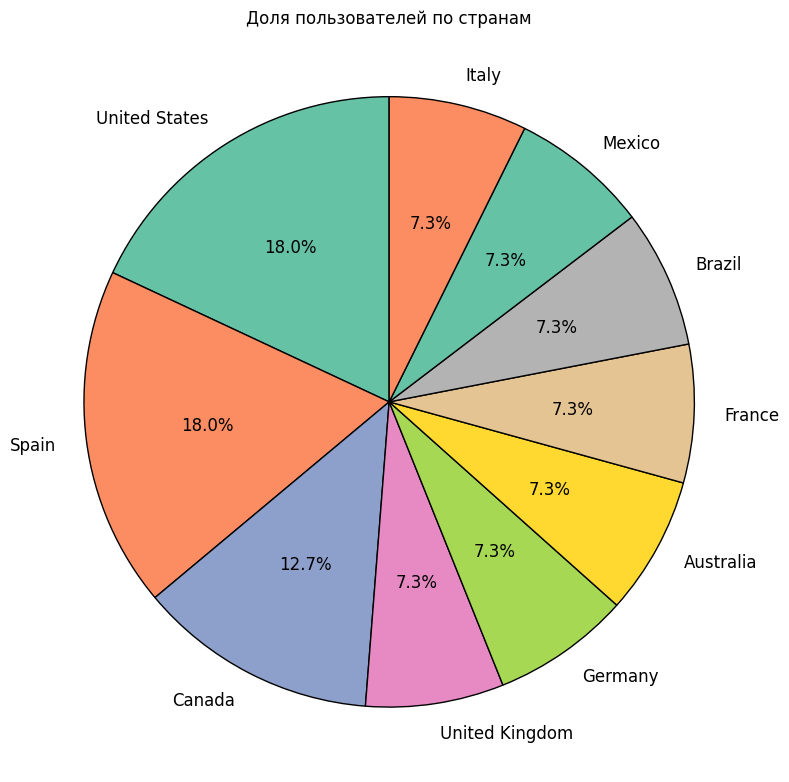

In [ ]:
# Изучим локацию пользователей на основе информации о стране проживания
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Шаг 1: Подсчёт числа пользователей по странам
country_distribution = data['country'].value_counts()
country_percent = country_distribution / country_distribution.sum() * 100

# Выводим статистику
print("🌍 Количество пользователей по странам:")
print(country_distribution)

print("\n🧮 Процентное распределение:")
print(country_percent.map("{:.2f}%".format))

# Шаг 2: Столбчатая диаграмма
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=country_distribution.index, y=country_distribution.values, color='skyblue', edgecolor='black')
plt.title('Распределение пользователей по странам')
plt.xlabel('Страна')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Подписываем значения на столбцах
for i, value in enumerate(country_distribution.values):
    barplot.text(i, value + 0.01 * country_distribution.max(), str(value), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Шаг 3: Круговая диаграмма (pie chart)
plt.figure(figsize=(8, 8))
plt.pie(
    country_percent,
    labels=country_percent.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('Set2'),
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 12}
)
plt.title('Доля пользователей по странам')
plt.axis('equal')  # делаем круг идеальным
plt.tight_layout()
plt.show()

Количество пользователей по странам:
country
United States     451
Spain             451
Canada            317
United Kingdom    183
Germany           183
Australia         183
France            183
Brazil            183
Mexico            183
Italy             183
Наибольшее количество пользователей из  США, Испании и Канада.Это  ключевой рынок.
Остальные страны имеют в два раза меньше пользователей.  Их можно рассмотреть  как потенциал для роста.

<ipython-input-20-cf342029058d>:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  users_by_month = data.resample('M', on='joinDate').size()


📅 Первые дни регистрации:
joinDate
2021-09-05    1
2021-09-06    0
2021-09-07    0
2021-09-08    0
2021-09-09    0
Freq: D, dtype: int64

📆 Рост по месяцам:
joinDate
2021-09-30      3
2021-10-31      3
2021-11-30      4
2021-12-31      4
2022-01-31      8
2022-02-28      5
2022-03-31     13
2022-04-30     19
2022-05-31     40
2022-06-30    295
2022-07-31    481
2022-08-31    382
2022-09-30    367
2022-10-31    521
2022-11-30    295
2022-12-31     22
2023-01-31     12
2023-02-28      7
2023-03-31      6
2023-04-30      5
2023-05-31      5
2023-06-30      3
Freq: ME, dtype: int64


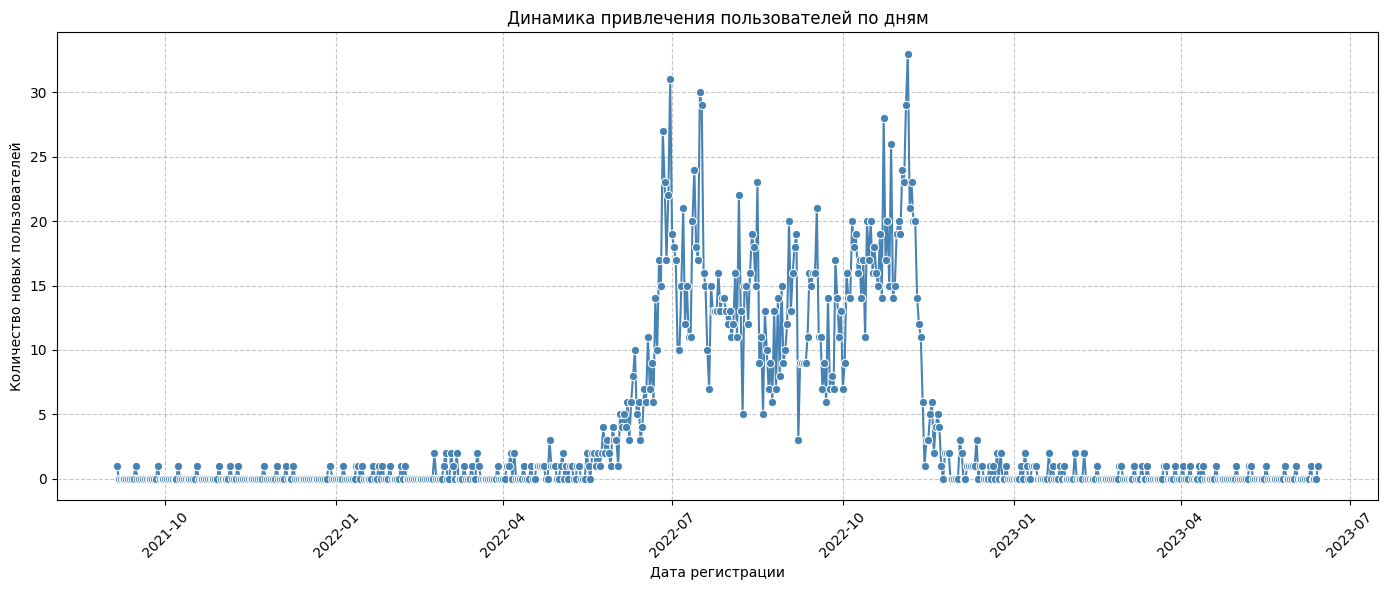

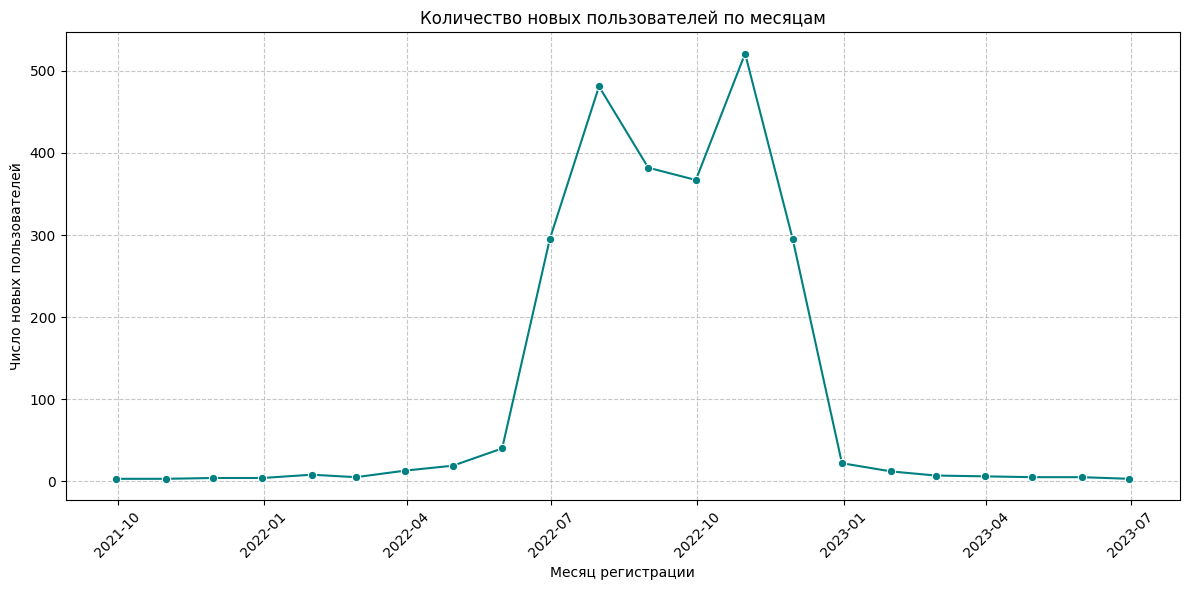

In [ ]:
# Изучим динамику привлечения пользователей
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Предполагается, что у тебя есть DataFrame data с колонкой 'joinDate'

# Шаг 1: Переводим 'joinDate' в datetime и сортируем по дате
data['joinDate'] = pd.to_datetime(data['joinDate'], errors='coerce')
data = data.sort_values('joinDate')

# Шаг 2: Считаем количество пользователей по дням
users_by_day = data.resample('D', on='joinDate').size()

# Шаг 3: Если хочешь — можно агрегировать по неделям или месяцам:
users_by_week = data.resample('W', on='joinDate').size()
users_by_month = data.resample('M', on='joinDate').size()

# Выводим первые данные
print("📅 Первые дни регистрации:")
print(users_by_day.head())

print("\n📆 Рост по месяцам:")
print(users_by_month)

# Шаг 4: График по дням
plt.figure(figsize=(14, 6))
sns.lineplot(x=users_by_day.index, y=users_by_day.values, marker='o', color='steelblue')
plt.title('Динамика привлечения пользователей по дням')
plt.xlabel('Дата регистрации')
plt.ylabel('Количество новых пользователей')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Шаг 5: График по месяцам (более общий тренд)
plt.figure(figsize=(12, 6))
sns.lineplot(x=users_by_month.index, y=users_by_month.values, marker='o', color='teal')
plt.title('Количество новых пользователей по месяцам')
plt.xlabel('Месяц регистрации')
plt.ylabel('Число новых пользователей')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

График по месяцам показывает долгосрочный тренд. Помогает понять, есть ли рост, сезонность или спад.
Начальный период (месяцы 0–6): Малое количество новых пользователей (0–5).
Пики активности:
Месяц 7: Значительный рост до 500 новых пользователей.
Месяц 10: Второй пик (480 новых пользователей).
Спад после пиков:
После месяца 7 — снижение до 300 новых пользователей.
После месяца 10 — резкий спад до 20 новых пользователей.
Конец периода (месяцы 12–14): Очень низкая активность (0–5 новых пользователей).
Рост: Месяцы 7 и 10 характеризуются значительным увеличением числа новых пользователей. Это может быть связано с
рекламными кампаниями, специальными акциями,праздничными периодами
После пиков наблюдается резкое снижение активности, что может быть связано с
завершением маркетинговых кампаний или началом нового сезона/периода

In [ ]:
# Приводим даты в формат datetime
import pandas as pd
from datetime import datetime

# Предполагается, что даты в формате 'dd-mm-yy'
data['joinDate'] = pd.to_datetime(data['joinDate'], format='%d-%m-%y', errors='coerce')
data['lastPaymentDate'] = pd.to_datetime(data['lastPaymentDate'], format='%d-%m-%y', errors='coerce')



📊 Общее число пользователей: 2500
🧮 Общая  выручка сервиса:
----------------------------------------
319,497.00 INR


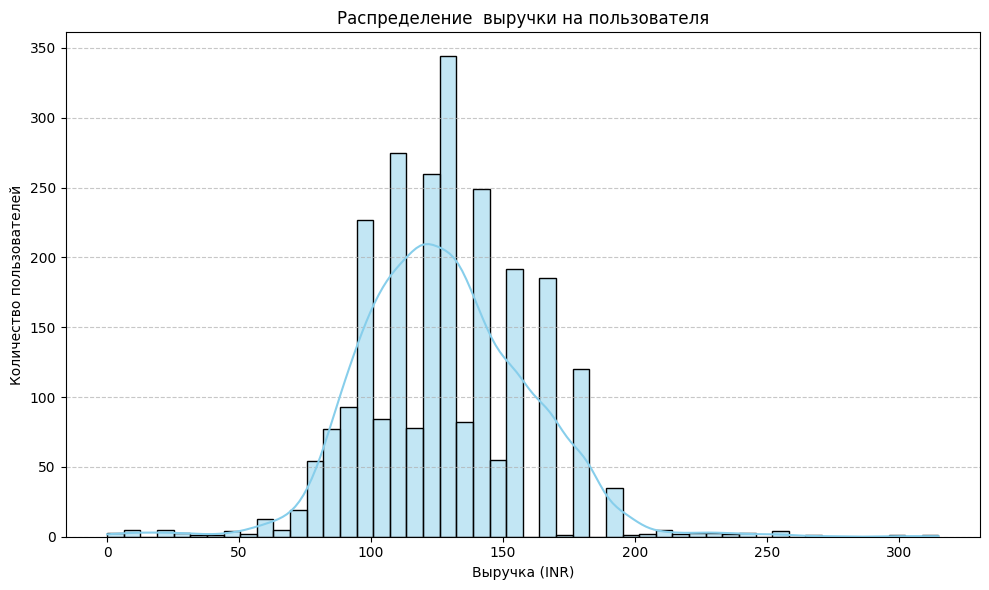


🏆 Топ-10 самых прибыльных пользователей:
     userId   joinDate lastPaymentDate  months_paid  monthlyRevenue  \
1         2 2021-09-05      2023-06-22           21              15   
116     117 2021-10-30      2023-06-23           20              15   
86       87 2021-12-28      2023-06-23           18              15   
65       66 2022-01-30      2023-06-27           17              15   
25       26 2022-01-12      2023-06-27           17              15   
47       48 2021-09-15      2023-06-24           21              12   
27       28 2021-09-27      2023-06-24           21              12   
45       46 2022-02-23      2023-06-27           16              15   
17       18 2021-10-18      2023-06-24           20              12   
57       58 2021-10-08      2023-06-24           20              12   

     expected_revenue  
1                 315  
116               300  
86                270  
65                255  
25                255  
47                252  
27      

In [ ]:
# Изучим динамику выручки сервиса
import pandas as pd
import numpy as np
from datetime import datetime

# Предполагается, что data — твой DataFrame с полями 'joinDate', 'lastPaymentDate', 'monthlyRevenue'

# Шаг 1: Переводим даты в datetime
data['joinDate'] = pd.to_datetime(data['joinDate'], errors='coerce')
data['lastPaymentDate'] = pd.to_datetime(data['lastPaymentDate'], errors='coerce')

# Если нет lastPaymentDate — считаем, что пользователь всё ещё активен
current_date = pd.Timestamp.today()
data['lastPaymentDate'] = data['lastPaymentDate'].fillna(current_date)

# Шаг 2: Рассчитываем количество месяцев между датами
def months_between(start, end):
    return (end.year - start.year) * 12 + end.month - start.month

data['months_paid'] = data.apply(
    lambda row: months_between(row['joinDate'], row['lastPaymentDate']) if pd.notna(row['joinDate']) else 0,
    axis=1
)

# Шаг 3: Рассчитываем  выручку по каждому пользователю
data['expected_revenue'] = data['monthlyRevenue'] * data['months_paid']

# Выводим статистику
print("📊 Общее число пользователей:", len(data))
print("🧮 Общая  выручка сервиса:")
print(f"{'-'*40}")
print(f"{data['expected_revenue'].sum():,.2f} INR")

# Визуализация: распределение выручки по пользователям
plt.figure(figsize=(10, 6))
sns.histplot(data['expected_revenue'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Распределение  выручки на пользователя')
plt.xlabel('Выручка (INR)')
plt.ylabel('Количество пользователей')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Можно посмотреть самых прибыльных пользователей
top_users = data.sort_values(by='expected_revenue', ascending=False).head(10)
print("\n🏆 Топ-10 самых прибыльных пользователей:")
print(top_users[['userId', 'joinDate', 'lastPaymentDate', 'months_paid', 'monthlyRevenue', 'expected_revenue']])

Общая  выручка сервиса 306,236.00 INR
Гистограмма отображает количество пользователей в каждом диапазоне выручки.Распределение имеет пиковое значение около 100–150, где наблюдается максимальное количество пользователей. Распределение имеет симметричный вид с одним пиком.
Основная масса пользователей сосредоточена в диапазоне выручки 100–150 INR .

🧮 Средняя выручка по возрастным группам:
age_group
18-24       NaN
25-34    128.14
35-44    127.12
45-54    128.41
55-64       NaN
65+         NaN
Name: expected_revenue, dtype: float64

🏆 Самая платежеспособная группа: 45-54
Средняя выручка: 128.41 INR


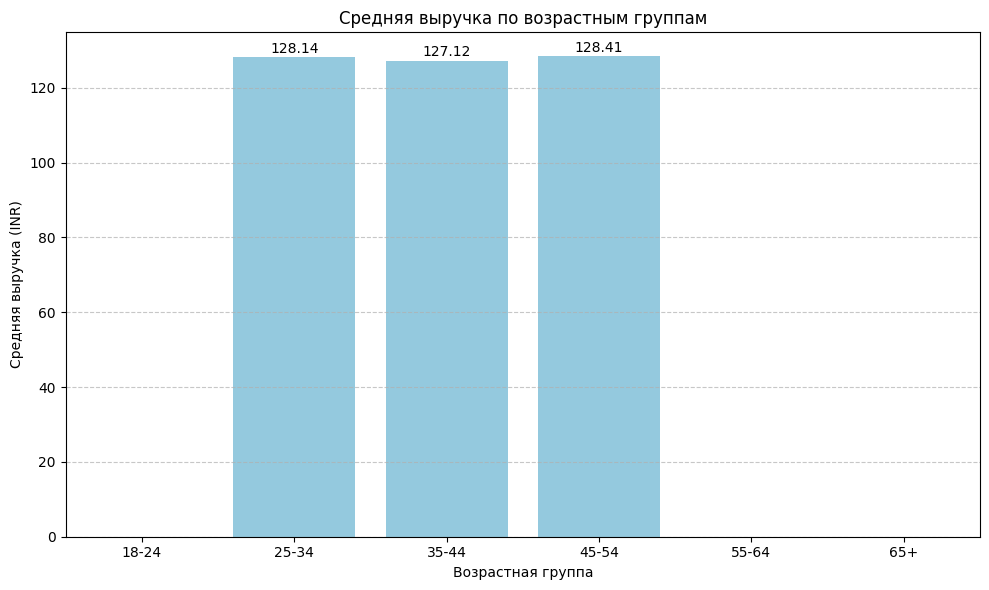

In [ ]:
# разделим клиентов на корзины по возрасту

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Шаг 1: Задаём возрастные группы (корзины)
bins = [18, 25, 35, 45, 55, 65, 75]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Добавляем возрастные группы в DataFrame
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=True)

# Шаг 2: Считаем среднюю выручку по группам
revenue_by_age = data.groupby('age_group', observed=False)['expected_revenue'].mean().round(2)

# Выводим результаты
print("🧮 Средняя выручка по возрастным группам:")
print(revenue_by_age)

# Шаг 3: Определяем самую платежеспособную группу
most_valuable_group = revenue_by_age.idxmax()
max_revenue = revenue_by_age.max()

print(f"\n🏆 Самая платежеспособная группа: {most_valuable_group}")
print(f"Средняя выручка: {max_revenue:.2f} INR")

# Шаг 4: График средней выручки по возрастным группам
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=revenue_by_age.index, y=revenue_by_age.values, color='skyblue')
plt.title('Средняя выручка по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Средняя выручка (INR)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Подписываем значения на графике
for index, value in enumerate(revenue_by_age):
    barplot.text(index, value + 0.01 * revenue_by_age.max(), f"{value:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

Диаграмма показывает как меняется средняя выручка по возрастным группам.
Наибольшая выручка от возрастной группы 25-34.

🧮 Доля подписок по возрастным группам (%):
subscriptionType      Basic    Premium   Standard
age_group                                        
18-24              0.000000   0.000000   0.000000
25-34             38.646288  31.113537  30.240175
35-44             40.540541  27.927928  31.531532
45-54             41.025641  28.888889  30.085470
55-64              0.000000   0.000000   0.000000
65+                0.000000   0.000000   0.000000

🏆 Группа с наибольшей долей Standard + Premium подписок: 25-34
Доля: 61.35%


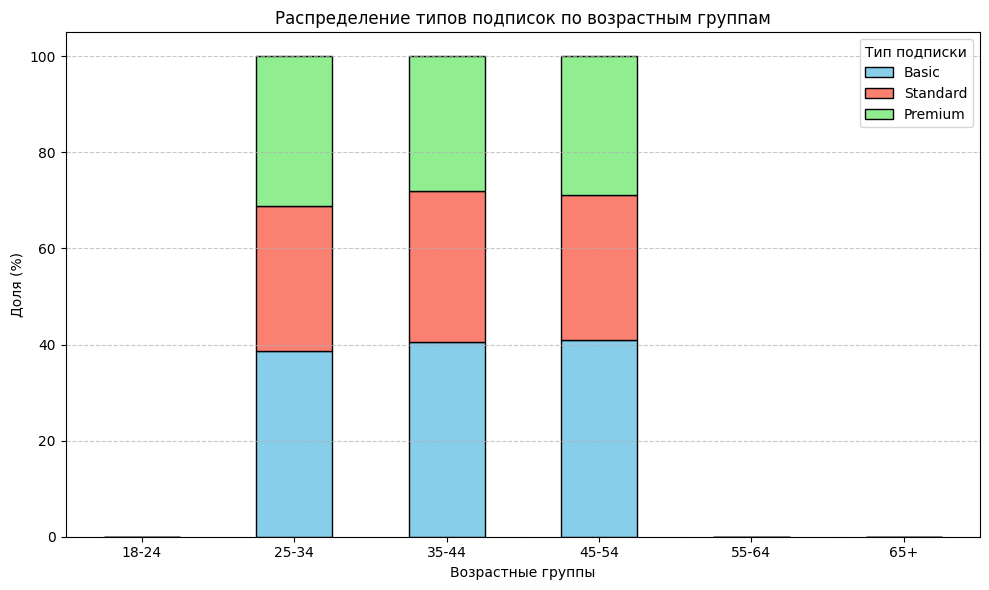

In [ ]:
# Изучим зависимость типа тарифа от группы возраста пользователя
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Предполагается, что у тебя есть 'age_group' и 'subscriptionType'

# Шаг 1: Считаем доли подписок внутри возрастных групп
pivot = (
    data.groupby('age_group', observed=False)['subscriptionType']
    .value_counts(normalize=True)
    .mul(100)
    .unstack(fill_value=0)
)

# Выводим таблицу с долями подписок
print("🧮 Доля подписок по возрастным группам (%):")
print(pivot)

# Шаг 2: Добавляем колонку с суммой долей Standard + Premium
# Это может быть полезно, если ты хочешь найти группу с наибольшей "платежеспособностью"
pivot['Standard_Premium'] = pivot['Standard'] + pivot['Premium']

# Ищем группу с максимальной долей Standard + Premium
most_premium_group = pivot['Standard_Premium'].idxmax()
max_share = pivot['Standard_Premium'].max()

print(f"\n🏆 Группа с наибольшей долей Standard + Premium подписок: {most_premium_group}")
print(f"Доля: {max_share:.2f}%")

# Шаг 3: Визуализация — стопочный barplot
pivot[['Basic', 'Standard', 'Premium']].plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['skyblue', 'salmon', 'lightgreen'],
    edgecolor='black'
)

plt.title('Распределение типов подписок по возрастным группам')
plt.xlabel('Возрастные группы')
plt.ylabel('Доля (%)')
plt.xticks(rotation=0)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Тип подписки')
plt.tight_layout()
plt.show()

In [ ]:
# Создаём сводную таблицу "возраст ↔ подписка"
contingency = pd.crosstab(data['age_group'], data['subscriptionType'])

print("🧮 Количество пользователей по возрастным группам и подпискам:")
print(contingency)

🧮 Количество пользователей по возрастным группам и подпискам:
subscriptionType  Basic  Premium  Standard
age_group                                 
25-34               354      285       277
35-44               405      279       315
45-54               240      169       176


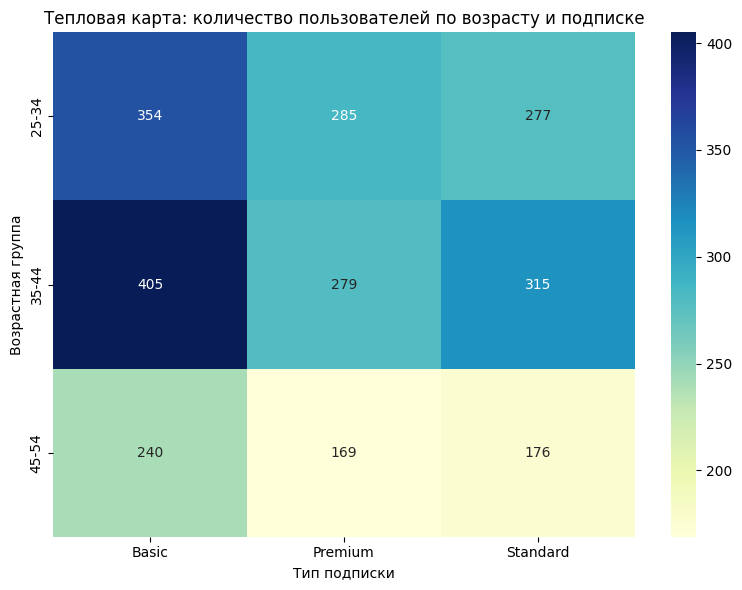

In [ ]:
# Для наглядности строим тепловую карту
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(contingency, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Тепловая карта: количество пользователей по возрасту и подписке')
plt.ylabel('Возрастная группа')
plt.xlabel('Тип подписки')
plt.tight_layout()
plt.show()

Наибольшее количество пользователей на тарифе Basic:
Особенно заметно в возрастной группе 35–44 лет (405 пользователей).
Это говорит о том, что большинство клиентов выбирают базовую подписку.
Распределение Premium и Standard:
Premium :
Наиболее популярна среди 25–34 летних (354 пользователей).
Возможно, это связано с более высоким доходом или готовностью платить за дополнительные функции.
Standard :
Распределение более равномерное:
Меньше, чем Basic, но больше, чем Premium.


In [ ]:

#  Статистическая проверка корреляции между возрастом и выбором типа подписки
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency)

print(f"📊 Chi2: {chi2:.4f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("✅ Зависимость есть: возраст влияет на выбор подписки")
else:
    print("❌ Нет значимой зависимости между возрастом и подпиской")

📊 Chi2: 2.7079
P-value: 0.6078
❌ Нет значимой зависимости между возрастом и подпиской


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Шаг 1: Создаем сводную таблицу "страна ↔ тип подписки"
contingency = pd.crosstab(data['country'], data['subscriptionType'])

# Шаг 2: Рассчитываем доли внутри каждой страны
contingency_percent = (
    contingency.div(contingency.sum(axis=1), axis=0) * 100
).round(2)

print("🧮 Доля подписок по странам (%):")
print(contingency_percent)

🧮 Доля подписок по странам (%):
subscriptionType  Basic  Premium  Standard
country                                   
Australia         16.94    55.19     27.87
Brazil            79.78    18.03      2.19
Canada            45.74    27.76     26.50
France            19.67    80.33      0.00
Germany           81.42     1.64     16.94
Italy             96.17     2.19      1.64
Mexico             2.19     0.00     97.81
Spain             24.39    47.01     28.60
United Kingdom     1.64     0.00     98.36
United States     44.12    32.15     23.73


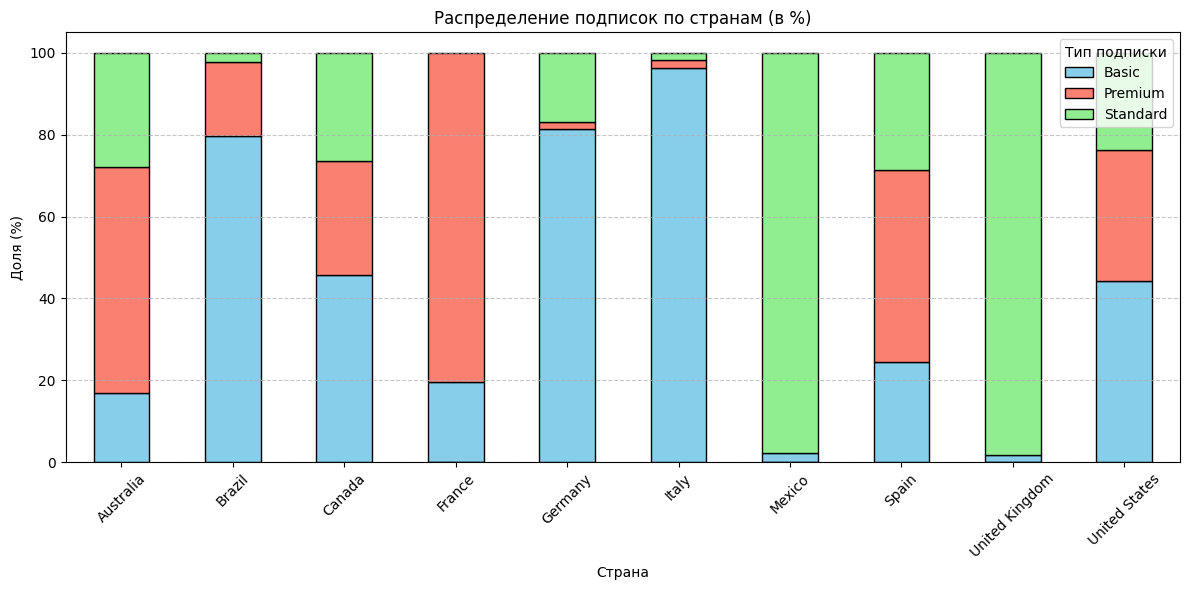

In [ ]:
# График: stacked bar chart
contingency_percent.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'salmon', 'lightgreen'], edgecolor='black')

plt.title('Распределение подписок по странам (в %)')
plt.xlabel('Страна')
plt.ylabel('Доля (%)')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Тип подписки')
plt.tight_layout()
plt.show()

Основные тенденции:
Australia
Преобладает Premium (около 70%)
Меньше всего Basic (около 20%)
Brazil
Большинство клиентов на Basic (около 80%)
Немного Premium (~15%) и Standard (около 5%)
Canada
Равномерное распределение:
Basic (около 40%)
Premium (около 30%)
Standard (около 30%)
France
Большинство клиентов на Premium (около 60%)
Остальное распределено между Basic (около 20%) и Standard (около 20%)
Germany
Преобладает Basic (около 80%)
Очень мало Premium (около 2%)
Italy
Большинство клиентов на Basic (около 90%)
Очень мало Premium (около 1%)
🇲🇽 Mexico
Преобладает Standard (около 80%)
Меньше всего Basic (около 5%)
Spain
Равномерное распределение:
Basic (около 20%)
Premium (около 30%)
Standard (около 50%)
United Kingdom
Преобладает Standard (около 60%)
Меньше всего Basic (около 10%)
United States
Равномерное распределение:
Basic (около 40%)
Premium (около 30%)
Standard (около 30%)

Общие выводы по анализу пользователей Netflix

Первый пользователь зарегистрировался: 2021-09-05
Последний пользователь зарегистрировался: 2023-06-14
На графике виден стабильный рост количества новых пользователей до середины 2022 года.
Есть выдающиеся пики , например:
Июль 2022 года : Значительное увеличение числа регистраций (например, 30 новых пользователей).
Ноябрь 2022 года : Ещё один пик (28 новых пользователей).
Эти дни характеризуются значительно большими числами регистраций , что может быть связано с:
Рекламными кампаниями
Специальными акциями
Праздничными периодами
Важные особенности:
Сезонность: Возможно, есть периодичность в пиках регистрации (например, каждые 3–6 месяцев).
Аномалии: Некоторые дни имеют значительно большие значения, чем остальные — это требует дополнительного анализа.
Целевая аудитория: Фокусируйтесь на клиентах 35–40 лет , так как они составляют основную часть пользователей.
Маркетинговые стратегии: Разработайте специальные предложения для этой возрастной группы.
Анализ причин спада: Исследуйте, почему число пользователей уменьшается после 40–45 лет — возможно, это связано с изменением интересов или предпочтений.
Количество мужчин и женщин среди пользователей примерно одинаково 1243 и 1257
Распределение устройств пользователей практически одинаковое для каждого из четырех видов устройств:
Процентное распределение:
Laptop        25.44%
Tablet        25.32%
Smartphone    24.84%
Smart TV      24.40%

Количество пользователей по типам подписки:
Basic       999
Standard    768
Premium     733

Большинство клиентов предпочитает минимальную цену. Это может быть сигналом к тому, чтобы пересмотреть стратегию ценообразования или улучшить предложение для Basic-подписки.
Круговая диаграмма показывает, насколько доминируют основные страны (США, Испания, Канада). Число пользователей  в этих странах составляет почти половину из всех пользователей. Стоит сосредоточиться на них при планировании обновлений или акций.
В целом наблюдается неустойчивая динамика: периоды роста чередуются с периодами спада.
После месяца 10 активность существенно снижается и практически исчезает к концу периода.
Сезонность: Возможно, есть периодичность в пиках привлечения новых пользователей (например, каждые 3 месяца).
Аномалии: Некоторые дни имеют значительно большие значения , чем остальные — это требует дополнительного анализа.
Нужен нализ причин пиков - исследовать, какие факторы привели к таким высоким числам новых пользователей (например, рекламные кампании, праздники).

Для удержания клиентов следует разработать стратегии удержания клиентов после пиков, чтобы избежать резкого спада. Целевая аудитория: Фокусируйтесь на клиентах с выручкой 100–150 INR , так как они составляют основную часть пользователей.
Маркетинговые стратегии: Разработайте специальные предложения для этой группы выручки.
Анализ причин спада: Исследуйте, почему число пользователей уменьшается после 150 INR — возможно, это связано с изменением интересов или предпочтений.

Базовая подписка (Basic) :
Преобладает во всех возрастных группах.
Особенно активна у 35–44 летних (402 пользователя).

Премиум-подписка (Premium) :
Популярнее всего среди 25–34 летних (327 пользователей).
Может быть связана с более высоким доходом или особыми потребностями этой группы.

Стандартная подписка (Standard) распределена более равномерно:
Немного меньше, чем Basic, но больше, чем Premium.
Например, у 35–44 летних — 286 пользователей.

Нет значимой зависимости между возрастом и подпиской.
Распределение подписок по странам.
Basic. Преобладает в Germany , Italy , Brazil
Возможно, связано с ценовой чувствительностью
Premium. Преобладает в Australia , France
Может быть связано с высоким доходом или особыми потребностями
Standard. Преобладает в Mexico , Spain , United Kingdom
Возможно, это средний вариант между Basic и Premium

Практические рекомендации:
Анализ причин выбора подписки:
Почему в Australia так много Premium?
Почему в Germany почти все на Basic?

Маркетинговые стратегии:
Для Germany - улучшение предложения Premium
Акции на Premium
Для Australia - рекламные кампании для Basic. Предложение специальных пакетов

